In [2]:
import os
from tqdm import tqdm

from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as ImageDisplay
from pathlib import Path
import glob

from img2vec_keras import Img2Vec

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import cv2

Using TensorFlow backend.


In [3]:
# Set up the letters being snapshotted

alphabet_uppercase = ['A','B','C','D','E','F','G','H','I','J',
                      'K','L','M','N','O','P','Q','R','S','T',
                      'U','V','W','X','Y','Z']

In [4]:
# Backbone of the image generation

# selected_font_family(string)
# postfix(string)
def loop_through_alphabet(font_file_path, family_name, font_file, postfix):
    target_letters = alphabet_uppercase
    for letter in target_letters:
        # W, H = (1280, 720) # image size
        W, H = (1600, 2000) # image size
        txt = letter # text to render
        background = (255,255,255) # white
        fontsize = 800
        font = ImageFont.truetype(font_file_path, fontsize)

        image = Image.new('RGBA', (W, H), background)
        draw = ImageDraw.Draw(image)

        # w, h = draw.textsize(txt) # not that accurate in getting font size
        w, h = font.getsize(txt)

        draw.text(((W-w)/2,(H-h)/2), txt, fill='black', font=font)
        # draw.text((10, 0), txt, (0,0,0), font=font)
        # img_resized = image.resize((188,45), Image.ANTIALIAS)

        save_location = os.getcwd() + '/images/' + letter + '/'

        if not os.path.exists(save_location):
            os.makedirs(save_location)
        
        # img_resized.save(save_location + '/sample.jpg')
        file_name = '/' + family_name + '-' + font_file + '-' +'-letter-' + letter + '-' + postfix + '.png'
        final_path = save_location + file_name
        if not os.path.exists(final_path):
            image.save(final_path)

In [5]:
def prepare_font_files_from_google_fonts():
    font_families = []
    for filepath in glob.glob('fonts/ofl/**/*.ttf'):
        folder_name = filepath.split('fonts/ofl/')
        family = folder_name[1].split('/')[0]
        font_file = folder_name[1].split('/')[1].split('.ttf')[0]
        font_item = { 'family': family, 'font_file': font_file}
        font_families.append(font_item)
    return font_families

In [14]:
font_families = prepare_font_files_from_google_fonts()

for font_obj in tqdm(font_families):
    family_name = font_obj['family']
    font_file = font_obj['font_file']
    font_family_path = 'fonts/ofl/' + family_name + '/' + font_file + '.ttf'
    try:
        loop_through_alphabet(font_family_path, family_name, font_file, 'uc')
    except Exception:
        pass




  0%|          | 0/2654 [00:00<?, ?it/s]


  0%|          | 1/2654 [00:00<08:54,  4.96it/s]


  0%|          | 2/2654 [00:00<08:57,  4.93it/s]


  0%|          | 3/2654 [00:00<09:32,  4.63it/s]


  0%|          | 4/2654 [00:00<09:27,  4.67it/s]


  0%|          | 5/2654 [00:01<10:11,  4.33it/s]


  0%|          | 6/2654 [00:01<12:02,  3.66it/s]


  0%|          | 7/2654 [00:01<14:09,  3.11it/s]


  0%|          | 8/2654 [00:02<12:39,  3.48it/s]

KeyboardInterrupt: 

In [6]:
img2vec = Img2Vec()

W0716 07:33:06.301437 4381623744 deprecation_wrapper.py:119] From /Users/leonardbogdonoff/.virtualenvs/publicart/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 07:33:06.335555 4381623744 deprecation_wrapper.py:119] From /Users/leonardbogdonoff/.virtualenvs/publicart/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 07:33:06.347504 4381623744 deprecation_wrapper.py:119] From /Users/leonardbogdonoff/.virtualenvs/publicart/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0716 07:33:06.479407 4381623744 deprecation_wrapper.py:119] From /Users/leonardbogdonoff/.virtualenvs/publicart/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174

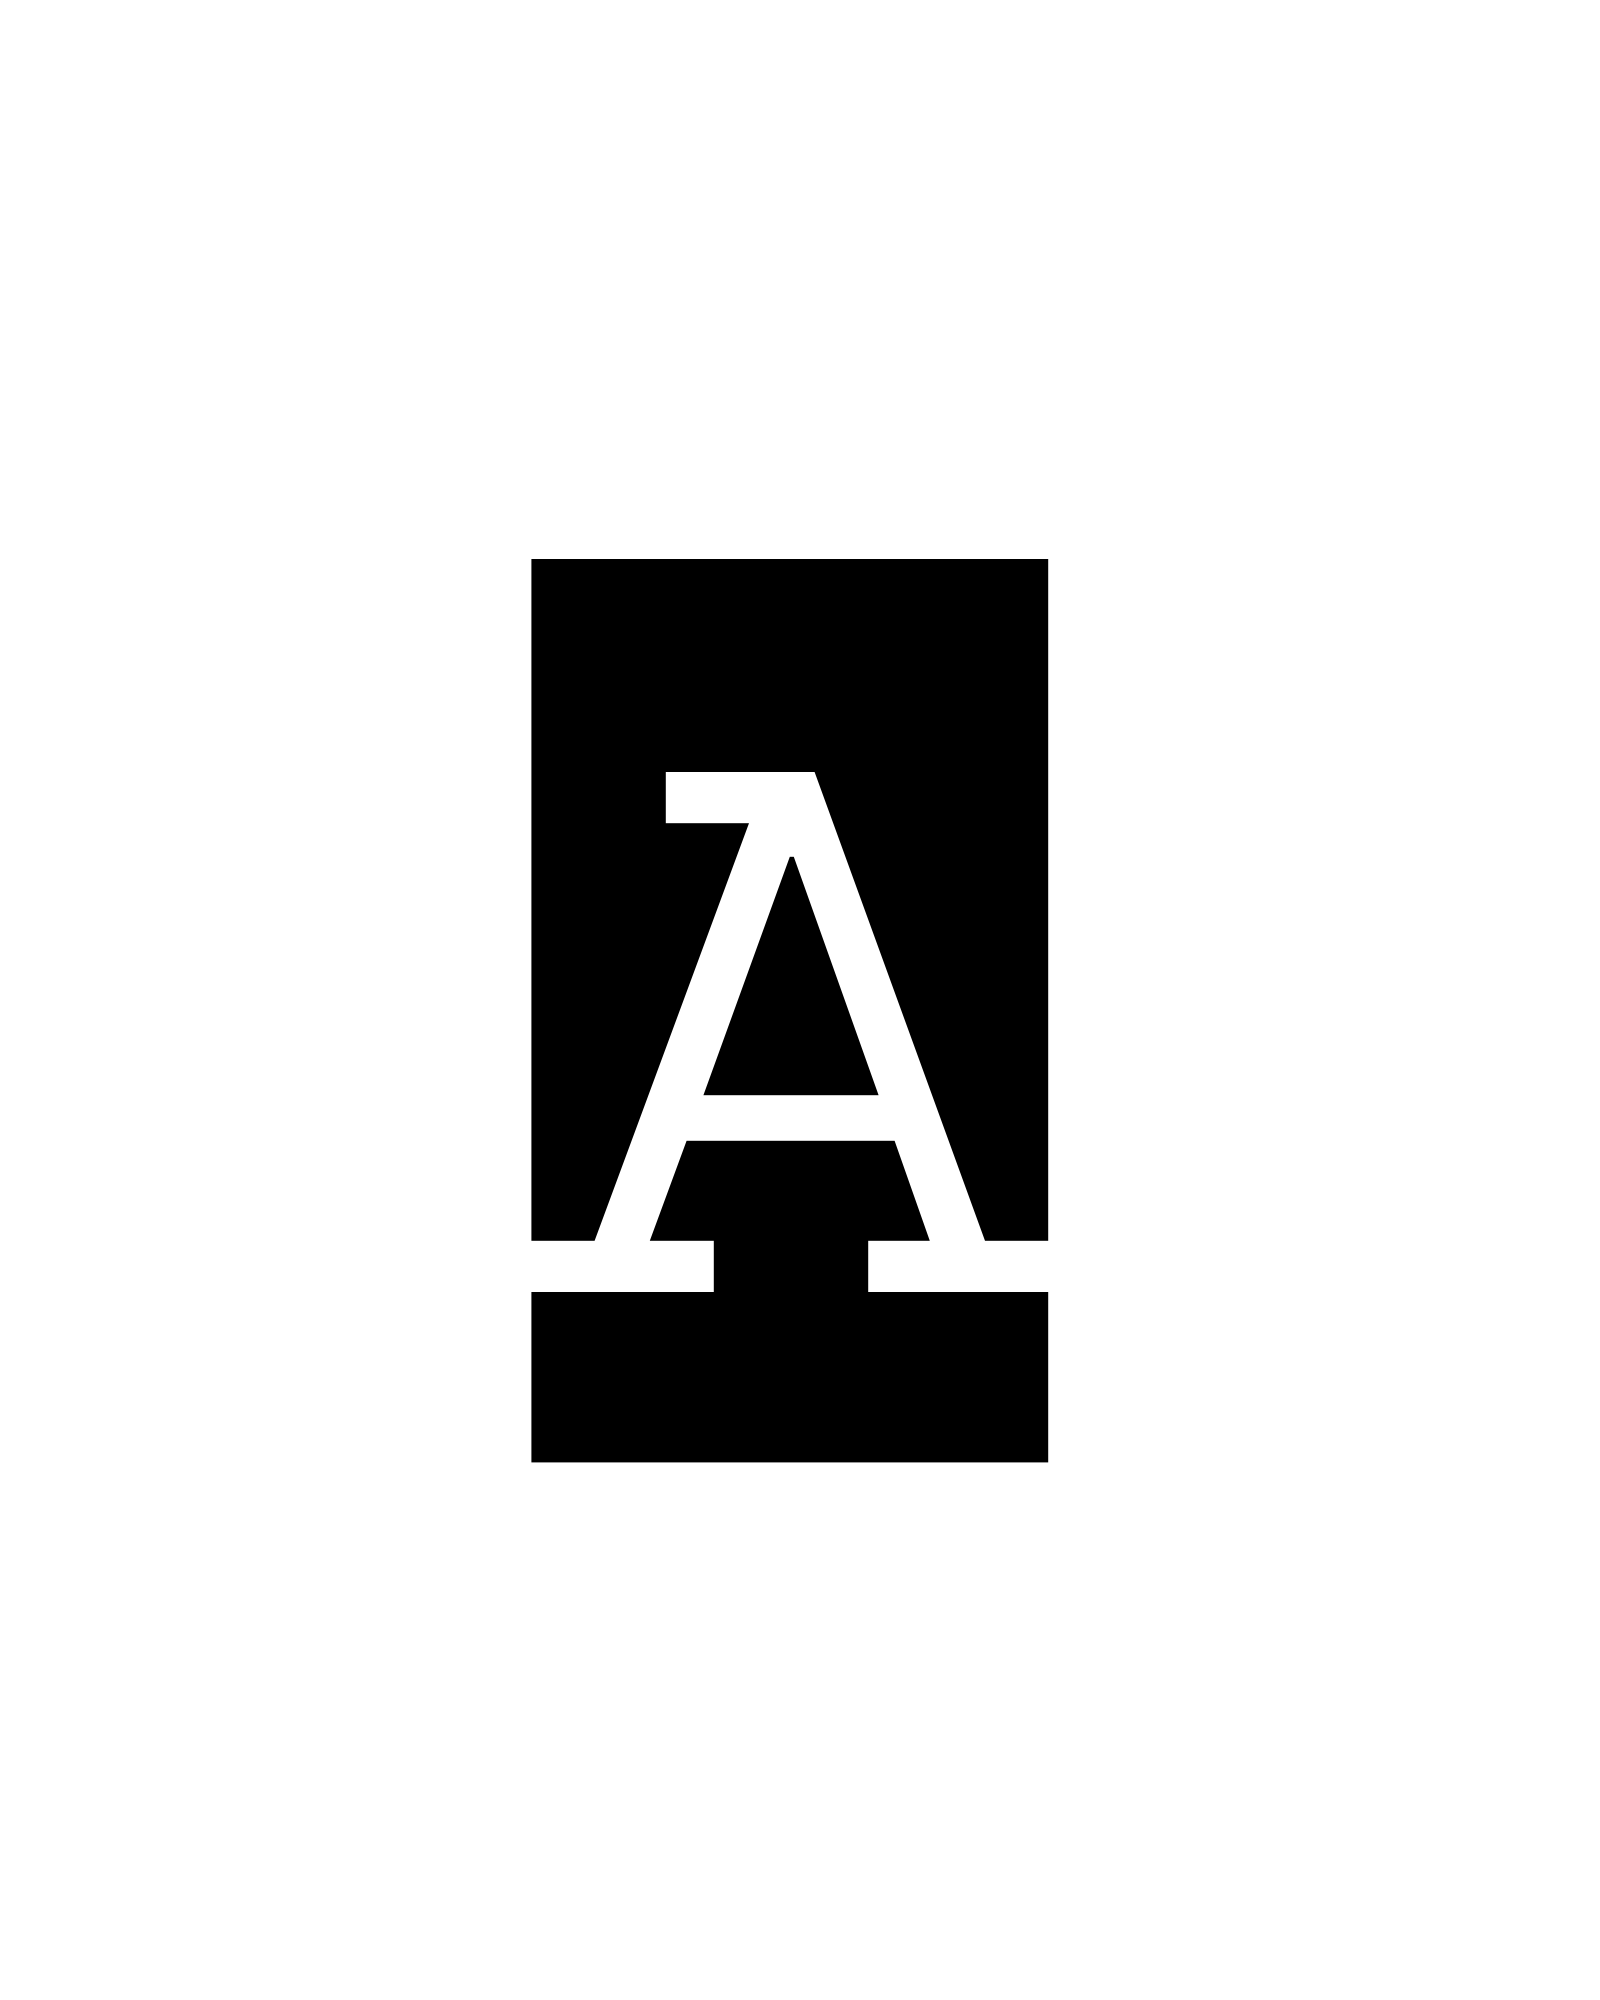

In [7]:
ImageDisplay('images/A/zillaslabhighlight-ZillaSlabHighlight-Regular--letter-A-uc.png')

In [8]:
image_paths = []
image_classes = alphabet_uppercase
for image_class in image_classes:
    image_paths.extend(glob.glob('images/' + image_class + '/*.png'))

In [9]:
len(image_paths)

68718

In [ ]:
image_vectors = {}
for image_path in image_paths:
    vector = img2vec.get_vec(image_path)
    image_vectors[image_path] = vector

In [ ]:
X = np.stack(image_vectors.values())

In [ ]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(X)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
print(np.shape(pca_result_50))

    
tsne = TSNE(n_components=2, verbose=1, n_iter=3000)
tsne_result = tsne.fit_transform(pca_result_50)

In [ ]:
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

In [ ]:
plt.scatter(tsne_result_scaled[:,0], tsne_result_scaled[:,1])